# **实验作业-3：变量选择**
刘蔚璁 10225501443

## **Q1.**

按以下步骤实现一个模拟实验：
1. 构造一个特征矩阵 $\mathbf{X}=(x_{ij})_{n\times(p+1)}$，即
    $$
    \mathbf{X} = 
    \begin{pmatrix}
    1 &; x_{11} &; x_{12} &; \cdots &; x_{1p}\\
    1 &; x_{21} &; x_{22} &; \cdots &; x_{2p}\\
    \vdots &; \vdots &; \vdots &; &; \vdots \\
    1 &; x_{n1} &; x_{n2} &; \cdots &; x_{np}
    \end{pmatrix}
    = \begin{pmatrix}
    1 &; \mathbf{x}_{1}' \\
    1 &; \mathbf{x}_{2}' \\
    \vdots &; \vdots \\
    1 &; \mathbf{x}_{n}' 
    \end{pmatrix},
    $$
    其中，$\mathbf{x}_{1}',\mathbf{x}_{2}',\cdots,\mathbf{x}_{p}'$ 是独立同分布的 $p$ 维随机向量，且服从多元正态分布。具体来说，
    $$
    \mathbf{x}_i \sim N_p(\mathbf{0}_p,\Sigma_x), \quad \Sigma_x = \sigma^2\cdot I_{p}
    $$
    这里 $I_{p}$ 是单位矩阵。
2. 构造响应变量 $\mathbf{y}=\mathbf{X}\beta+\epsilon$，其中，$\beta=(\mathbf{1}_{1+p_1}',\mathbf{0}_{p-p_1}')$。特别说明一下，这样构造的 $\beta$ 使得 $\textbf{X}$ 中的前 $p_1+1$ 列的特征（包括常数项）对因变量有影响。同时，误差向量 $\epsilon=(\epsilon_1,\epsilon_2,\cdots,\epsilon_n)'$，其中 $\epsilon_i$ 独立同分布于正态分布 $N(0,\sigma_{\epsilon}^2),i=1,2,\cdots,n$。
3. 给定 $\textbf{x}_0=(1,\textbf{0.05}_{20}')',y_0=\textbf{x}_0'\beta+\epsilon_0$的最佳点预测值为 $\textbf{x}_0'\beta$。这里是真实的参数 $\beta$。
4. 给定训练数据 $\mathbf{y}$ 和 $\mathbf{X}$，建立第 $k$ 个模型，即
    $$
    y=\beta_0+\sum\limits_{j=1}^kx_j\beta_j+\epsilon.
    $$
    于是，我们可以得到其相应的最小二乘估计 $\hat{\beta}^{(k)}=(\hat{\beta}_0,\hat{\beta}_1,\cdots,\hat{\beta}_k,\mathbf{0}_{20-k}')'$。由此，$y_0$ 的预测值为 $\hat{y}_0^{(k)}=\mathbf{x}_0'\hat{\beta}^{(k)}$。这里是所得到的估计值 $\hat{\beta}^{(k)}$。
5. 重复1-4步 $M$ 次，可以得到 $M$ 个不同预测值，分别记为 $\hat{y}_{0,m}^{(k)} ,k=1,2,⋯,p;m=1,2,⋯,M$。于是，可以计算偏差平方、方差和均方误差，即
    $$
    Bias_k^2 = \left(
    M^{-1}\sum_{m=1}^M \hat{y}_{0,m}^{(k)} - \mathbf{x}_0'\mathbf{\beta}
    \right)^2
    $$
    $$
    Var_k = M^{-1}\sum_{m=1}^{M}\left(
    \hat{y}_{0,m}^{(k)} - M^{-1}\sum_{m=1}^{M} \hat{y}_{0,m}^{(k)}
    \right)^2
    $$
    $$
    MSE_k = M^{-1} \sum_{m=1}^{M}\left(\hat{y}_{0,m}^{(k)} - \mathbf{x}_0'\mathbf{\beta} \right)^2
    $$

- 取值：
    - $\sigma^2=0.2^2$ ： 自变量的波动
    - $\sigma_{\epsilon^2}=3^2$ ： 响应变量的波动
    - $p=20$ ： 可作为自变量的变量个数
    - $p_1=10$ ： 真实模型的自变量个数
    - $M=5000$ ： 重复次数（一般比较大）

- 任务
    1. 绘制一张图片（以 $k$ 作为横坐标），偏差平方、方差以及均方误差这三条曲线；
    2. 基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

### **实验过程**

#### **实验前准备**

载入所需要的 Python 安装包：

In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt

设置参数：

In [4]:
M = 5000    # 重复次数
n = 300     # 样本量
p = 20      # 总特征数
p1 = 10     # 有效特征数
sigma_2 = 0.2 ** 2
sigma_epsilon2 = 3 ** 2
Sigma_x = sigma_2 * np.eye(p)

#### **step1.**

构造一个特征矩阵 $\mathbf{X}=(x_{ij})_{n\times(p+1)}$，即
$$
\mathbf{X} = 
\begin{pmatrix}
1 &; x_{11} &; x_{12} &; \cdots &; x_{1p}\\
1 &; x_{21} &; x_{22} &; \cdots &; x_{2p}\\
\vdots &; \vdots &; \vdots &; &; \vdots \\
1 &; x_{n1} &; x_{n2} &; \cdots &; x_{np}
\end{pmatrix}
= \begin{pmatrix}
1 &; \mathbf{x}_{1}' \\
1 &; \mathbf{x}_{2}' \\
\vdots &; \vdots \\
1 &; \mathbf{x}_{n}' 
\end{pmatrix},
$$
其中，$\mathbf{x}_{1}',\mathbf{x}_{2}',\cdots,\mathbf{x}_{p}'$ 是独立同分布的 $p$ 维随机向量，且服从多元正态分布。具体来说，
$$
\mathbf{x}_i \sim N_p(\mathbf{0}_p,\Sigma_x), \quad \Sigma_x = \sigma^2\cdot I_{p}
$$
这里 $I_{p}$ 是单位矩阵。

In [5]:
def construct_X(Sigma_x):
    X_intercep = np.ones((n, 1))
    X_slope = np.random.multivariate_normal(np.zeros(p), Sigma_x, n)
    return np.hstack((X_intercep,X_slope))

#### **step2.**

构造响应变量 $\mathbf{y}=\mathbf{X}\beta+\epsilon$，其中，$\beta=(\mathbf{1}_{1+p_1}',\mathbf{0}_{p-p_1}')$。特别说明一下，这样构造的 $\beta$ 使得 $\textbf{X}$ 中的前 $p_1+1$ 列的特征（包括常数项）对因变量有影响。同时，误差向量 $\epsilon=(\epsilon_1,\epsilon_2,\cdots,\epsilon_n)'$，其中 $\epsilon_i$ 独立同分布于正态分布 $N(0,\sigma_{\epsilon}^2),i=1,2,\cdots,n$。

In [6]:
def construct_y(X,beta):
    epsilon = np.random.normal(0, np.sqrt(sigma_epsilon2), n)
    return X @ beta + epsilon

#### **step3.**

给定 $\textbf{x}_0=(1,\textbf{0.05}_{20}'),y_0=\textbf{x}_0'\beta+\epsilon_0$的最佳点预测值为 $\textbf{x}_0'\beta$。这里是真实的参数 $\beta$。

In [7]:
def construct_x0y0(beta):
    x0 = np.concatenate(([1], np.zeros(p)))
    x0[1:21] = 0.05  # x0 向量
    y0 = x0 @ beta
    return x0,y0

#### **step4.**

给定训练数据 $\mathbf{y}$ 和 $\mathbf{X}$，建立第 $k$ 个模型，即
    $$
    y=\beta_0+\sum\limits_{j=1}^kx_j\beta_j+\epsilon.
    $$
    于是，我们可以得到其相应的最小二乘估计 $\hat{\beta}^{(k)}=(\hat{\beta}_0,\hat{\beta}_1,\cdots,\hat{\beta}_k,\mathbf{0}_{20-k}')'$。由此，$y_0$ 的预测值为 $\hat{y}_0^{(k)}=\mathbf{x}_0'\hat{\beta}^{(k)}$。这里是所得到的估计值 $\hat{\beta}^{(k)}$。

In [8]:
def construct_modules(k,X,y,beta):
    X_k = X[:, :k+1]  # 只使用前 k+1 个特征
    # model = LinearRegression().fit(X_k, y)
    # # 估计系数向量 hat_beta
    # hat_beta_k = np.concatenate([[model.intercept_], model.coef_, np.zeros(p - k)])

    hat_beta_k = np.linalg.inv(X_k.T @ X_k) @ (X_k.T @ y)
    hat_beta_k = np.concatenate([hat_beta_k ,np.zeros(p - k)])

    return hat_beta_k

#### **step5.**

重复1-4步 $M$ 次，可以得到 $M$ 个不同预测值，分别记为 $\hat{y}_{0,m}^{(k)} ,k=1,2,⋯,p;m=1,2,⋯,M$。于是，可以计算偏差平方、方差和均方误差，即
$$
Bias_k^2 = \left(
M^{-1}\sum_{m=1}^M \hat{y}_{0,m}^{(k)} - \mathbf{x}_0'\mathbf{\beta}
\right)^2
$$
$$
Var_k = M^{-1}\sum_{m=1}^{M}\left(
\hat{y}_{0,m}^{(k)} - M^{-1}\sum_{m=1}^{M} \hat{y}_{0,m}^{(k)}
\right)^2
$$
$$
MSE_k = M^{-1} \sum_{m=1}^{M}\left(\hat{y}_{0,m}^{(k)} - \mathbf{x}_0'\mathbf{\beta} \right)^2
$$

In [10]:
# 存储偏差平方、方差、均方误差
bias_squared = np.zeros(p)
variance = np.zeros(p)
mse = np.zeros(p)
sum_pred = np.zeros(p)
hat_y_k = np.zeros((M, p))
beta = np.concatenate([np.ones(p1 + 1), np.zeros(p - p1)])
x0,y0 = construct_x0y0(beta)

for m in range(M):
    X = construct_X(Sigma_x)
    y = construct_y(X,beta)

    for k in range(1,p+1):
        hat_beta_k = construct_modules(k,X,y,beta)

        # print(x0.shape,hat_beta_k.shape)
        y0_pred = x0 @ hat_beta_k
        hat_y_k[m, k - 1] = y0_pred

        # 累积预测值以计算 MSE、Bias、Var
        # bias_squared[k-1] += y0_pred
        # variance[k-1] += y0_pred
        mse[k-1] += (y0_pred - y0) ** 2
        sum_pred[k-1] += y0_pred

# 计算最终的偏差平方、方差和均方误差
mean_pred = sum_pred / M
bias_squared = (mean_pred - y0) ** 2
mse /= M

for k in range(1, p + 1):
    variance[k - 1] = np.mean((hat_y_k[:, k - 1] - mean_pred[k-1]) ** 2)  # 计算方差

print("bias_squared:", np.around(bias_squared, decimals=4))
print("variance:", np.around(variance, decimals=4))
print("mse:", np.around(mse, decimals=4))

bias_squared: [1.983e-01 1.559e-01 1.195e-01 8.710e-02 5.930e-02 3.740e-02 2.070e-02
 8.900e-03 1.900e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04]
variance: [0.0345 0.0367 0.039  0.0407 0.0431 0.0455 0.0472 0.0492 0.0511 0.0527
 0.0551 0.057  0.0595 0.061  0.0628 0.0645 0.0663 0.0683 0.071  0.0732]
mse: [0.2329 0.1926 0.1585 0.1278 0.1024 0.083  0.0679 0.0581 0.053  0.0528
 0.0551 0.057  0.0596 0.061  0.0629 0.0646 0.0663 0.0684 0.0711 0.0732]


#### **Task1.**
绘制一张图片（以 $k$ 作为横坐标），偏差平方、方差以及均方误差这三条曲线；

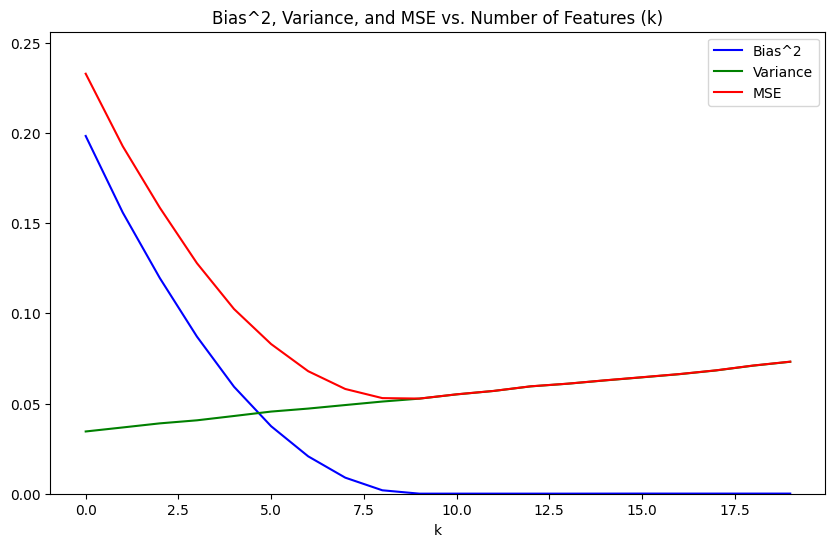

In [11]:
k_values = np.arange(0, p )
plt.figure(figsize=(10, 6))
plt.plot(k_values, bias_squared[0:], label="Bias^2", color="blue")
plt.plot(k_values, variance[0:], label="Variance", color="green")
plt.plot(k_values, mse[0:], label="MSE", color="red")
plt.ylim(bottom=0, top=max(np.max(bias_squared), np.max(variance), np.max(mse)) * 1.1)  # 增加一点顶部空间

plt.xlabel("k")
plt.title("Bias^2, Variance, and MSE vs. Number of Features (k)")
plt.legend()
plt.show()

#### **Task2.**

基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

首先理解所使用的三个指标：
- **偏差**：偏差反映了模型预测值的期望与真实值之间的差异。在回归分析中，较高的偏差通常意味着模型无法捕捉到数据中的真实关系，从而导致欠拟合。随着模型复杂度的增加（例如，增加自变量的数量），偏差通常会减小，因为模型能够更好地拟合训练数据。
- **方差**：方差表示模型预测值对训练数据中噪声的敏感性。较高的方差通常意味着模型过于复杂，容易受到训练数据中小波动的影响，导致过拟合。随着自变量数量的增加，方差往往会增加。
- **均方误差**：均方误差是偏差平方与方差之和。它衡量的是模型的总体预测误差。

基于上图，我们可以观察模型在不同复杂度（即参数 $k$ 的数量）下的表现：

1. **欠拟合**<br>
    从图像的左侧（$k<p_1$）可以看到，随着模型复杂度的增加，$\mathbf{Bias}_k^2$ 逐渐下降。偏差平方高说明模型的预测均值远离真实值，也即模型无法捕捉数据的模式，因此在较小的 $k$ 值下表现出欠拟合。这是因为简单模型在学习过程中不够灵活，导致对训练数据的拟合程度不足，从而产生较大的系统性偏差。这种情况下，模型的预测能力受到限制，对所有数据的表现都较差，无法取得较好的泛化性能。

2. **过拟合**<br>
    因为过拟合的估计结果是无偏估计，所以当 $k>10$ 时 $\mathbf{Bias}_k^2$ 为 $0$；在图像的右侧（$k>p_1$）可以观察到，$\mathbf{Var}_k$ 逐渐增加，说明模型变得更为灵活，但预测结果不稳定，容易受到训练数据中噪声的影响。在这种情况下，模型在训练数据上的拟合很好，但对于新数据的泛化能力较差。过拟合会导致 $\mathbf{MSE}_k$ 逐渐增大，模型对未知数据的表现变差，方差增加，模型的预测结果因数据的细微波动而不稳定。

3. **均方误差的最小值**<br>
图中 $\mathbf{MSE}_k$ 曲线的最低点通常是模型在偏差与方差之间取得最佳平衡的位置，即模型在该点的复杂度既不会欠拟合也不会过拟合。此时，模型对数据的捕捉能力较强，且能够较好地适应新数据。可以看出，当 $k=p_1$ 时 $\mathbf{MSE}$ 取得最小值，这与我们的预设一致。

综上，欠拟合使得模型表现过于简单，对数据的捕捉能力不足，导致预测准确性较低；而过拟合则使得模型过于灵活，对数据噪声敏感，导致泛化能力下降。

## **Q2.**

请设计一个模拟实验，来比较不同变量选择准则的差异。

要求：
1. 可从四种常用的变量选择准则中任选两种及以上，也可以自行调研其他的变量选择准则（但需要在实验报告中给出明确的定义或计算公式）。
2. 类似于Q1，需要提供如何构造数据、如何进行实验、采用合适的方式（指标计算或画图）来得到结论。
3. 实验结论需要可被验证。

### **实验设计**

本实验分为两部分：
1. 变量选择准则的比较 <br>
    特征数设置较小，采用全子集回归法，计算每个模型的修正后的决定系数、$\mathbf{AIC}$ 和 $\mathbf{aic}$ 并比较这些指标，选择效果最佳的指标
    
2. 进一步比较变量选择的路径<br>
    使用第一部分中选择出来的指标，应用前进法、后退法和逐步回归三种路径进行变量选择，比较这些方法的选择结果



- ##### **Part1.**
    1. 构造一个特征矩阵，$\mathbf{X}=(x_{ij})_{n\times(p+1)}$，即
        $$
        \mathbf{X} = 
        \begin{pmatrix}
        1 &; x_{11} &; x_{12} &; \cdots &; x_{1p}\\
        1 &; x_{21} &; x_{22} &; \cdots &; x_{2p}\\
        \vdots &; \vdots &; \vdots &; &; \vdots \\
        1 &; x_{n1} &; x_{n2} &; \cdots &; x_{np}
        \end{pmatrix}
        = \begin{pmatrix}
        1 &; \mathbf{x}_{1}' \\
        1 &; \mathbf{x}_{2}' \\
        \vdots &; \vdots \\
        1 &; \mathbf{x}_{n}' 
        \end{pmatrix},
        $$
        其中，$\mathbf{x}_{1}',\mathbf{x}_{2}',\cdots,\mathbf{x}_{p}'$ 是独立同分布的 $p$ 维随机向量，且服从多元正态分布。具体来说，
        $$
        \mathbf{x}_i \sim N_p(\mathbf{0}_p,\Sigma_x), \quad \Sigma_x = \sigma^2\cdot I_{p}
        $$
        这里 $I_{p}$ 是单位矩阵。
    2. 构造响应变量 $\mathbf{y}=\mathbf{X}\beta+\epsilon$，其中，$\beta=(\mathbf{1}_{1+p_1}',\mathbf{0}_{p-p_1}')$，即前 $p_1+1$ 列的特征（包括常数项）对因变量有影响，其余特征为噪声特征。同时，误差向量 $\epsilon=(\epsilon_1,\epsilon_2,\cdots,\epsilon_n)'$，其中 $\epsilon_i$ 独立同分布于正态分布 $N(0,\sigma_{\epsilon}^2),i=1,2,\cdots,n$。
    3. 考虑自变量的所有组合 $$\{x_1 \},\{x_2\},\cdots,\{x_p\},\{x_1,x_2\},\cdots,\{x_1,x_2,\cdots,x_p\},$$对每个组合建立模型。
    4. 计算每个模型的修正后的决定系数、AIC 和 $\mathbf{BIC}$，得到最优的自变量组合。
    5. 重复上述步骤 $M$ 次，以获得更可靠的结果。

    - 指标定义
        $$\begin{aligned}
        \mathbf{AIC}&=-2\ln (模型最大似然)+2(模型独立参数个数) \\
        \mathbf{aic}&=-2\ln(模型最大似然)+\ln(n)(模型独立参数个数) \\
        \tilde{R}^2 &= 1-\frac{n-1}{n-p-1}(1-R^2)       
        \end{aligned}$$

    - 取值：
        - $\sigma^2=0.2^2$ ： 自变量的波动
        - $\sigma_{\epsilon^2}=3^2$ ： 响应变量的波动
        - $p=10$ ： 可作为自变量的变量个数
        - $p_1=5$ ： 真实模型的自变量个数
        - $M=5000$ ： 重复次数（一般比较大）



- ##### **Part2.**
    1. 同 Part1，构造一个 $n\times(p+1)$ 维的特征矩阵。
    2. 构造响应变量 $\mathbf{y}=\mathbf{X}\beta+\epsilon$，其中，$\beta$ 是一个 $p+1$ 维向量，从中**随机**挑出 $p_1$ 个数置为1，其它为0，即该 $p_1$ 列的特征对因变量有影响，其余特征为噪声特征。同时，误差向量 $\epsilon=(\epsilon_1,\epsilon_2,\cdots,\epsilon_n)'$，其中 $\epsilon_i$ 独立同分布于正态分布 $N(0,\sigma_{\epsilon}^2),i=1,2,\cdots,n$。<br>
        **PS.** 随机选择能够有效排除特征聚集，使得前进法和后退法等变量选择算法能够更好地评估特征对模型的贡献。
    3. 分别使用前进法、后退法和逐步回归进行变量选择，得到最优的自变量组合。
    4. 重复上述步骤 $M$ 次，以获得更可靠的结果。
    - 取值：
        - $\sigma^2=0.2^2$ ： 自变量的波动
        - $\sigma_{\epsilon^2}=3^2$ ： 响应变量的波动
        - $p=20$ ： 可作为自变量的变量个数
        - $p_1=10$ ： 真实模型的自变量个数
        - $M=5000$ ： 重复次数（一般比较大）

#### **评估指标**
- **真阳性率（True Positive Rate, TPR）**：真实相关变量被选择的比例。
- **假阳性率（False Positive Rate, FPR）**：噪声变量被错误选择的比例。
- **模型均方误差（MSE）**：所选模型的均方误差。

通过绘制不同变量选择方法的TPR、FPR和MSE的箱线图，比较各个方法的性能。

### **实验过程**

导入所需要的 Python 安装包：

In [15]:
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### **Part1.**

##### **代码编写**

TPR mean
AIC: 0.4227 BIC: 0.2577 adjR: 0.4273
FPR mean
AIC: 0.18 BIC: 0.073 adjR: 0.6828
MSE mean
AIC: 8.8848 BIC: 8.9695 adjR: 9.1041


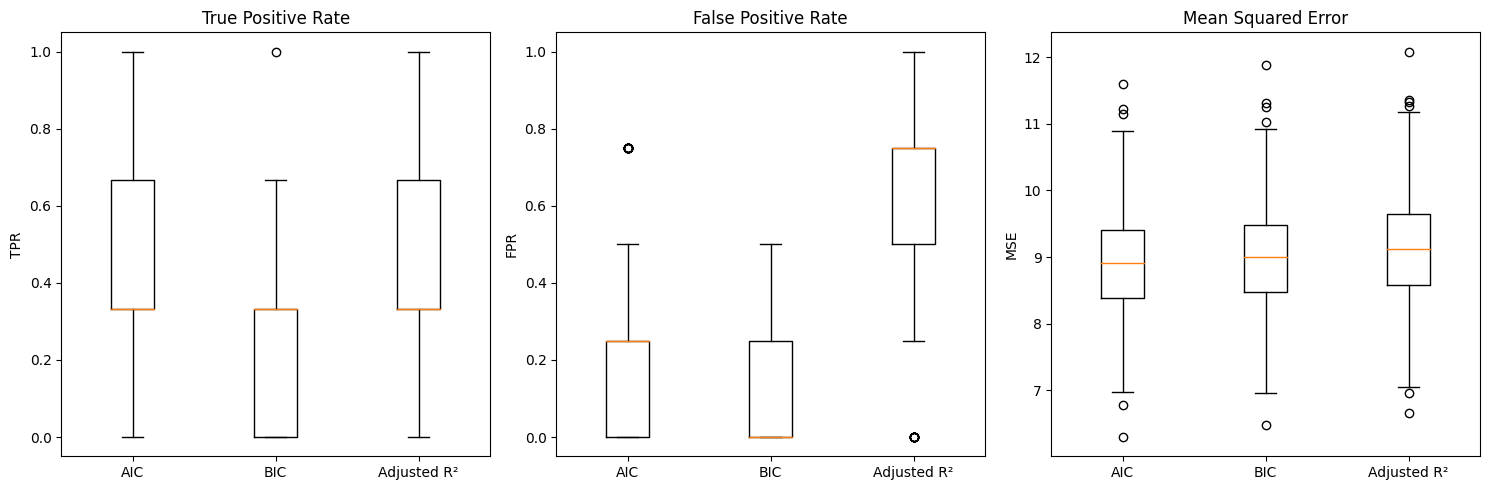

In [16]:
# 设置参数
p = 7
p1 = 3
Sigma_x = sigma_2 * np.eye(p)
M = 1000

aic_TPR = []
bic_TPR = []
adjR_TPR = []
aic_FPR = []
bic_FPR = []
adjR_FPR = []
aic_mses = []
bic_mses = []
adjR_mses = []

# 进行 M 次实验
for m in range(M):
    X = construct_X(Sigma_x)

    # 初始化 beta 向量
    indices = np.random.choice(range(1, p + 1), p1, replace=False)  
    indices.sort() 
    beta = np.zeros(p + 1) 
    beta[0] = 1  # 截距项
    beta[indices] = 1  # 设置影响变量的系数为1
    True_features = set(indices)

    y = construct_y(X,beta)

    best_aic = np.inf
    best_bic = np.inf
    best_adjusted_R = np.inf
    best_aic_combination = None
    best_bic_combination = None
    best_adjR_combination = None
    best_beta_aic = None
    best_beta_bic = None
    best_beta_adjR = None

    for k in range(1, p + 1):
        for combo in itertools.combinations(range(1, p + 1), k):
            X_subset = X[:, (0,) + combo]  # 选择特定的自变量

            model = sm.OLS(y, X_subset).fit()  # 拟合模型
            
            aic = model.aic
            bic = model.bic
            adjusted_R = model.rsquared_adj

            if aic < best_aic:
                best_aic = aic
                best_aic_combination = combo
                best_beta_aic = model.params    # 包括截距项
            if bic < best_bic:
                best_bic = bic
                best_bic_combination = combo
                best_beta_bic = model.params
            if adjusted_R < best_adjusted_R:
                best_adjusted_R = adjusted_R
                best_adjR_combination = combo
                best_beta_adjR = model.params
    
    selected_aic_vars = set(best_aic_combination)
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(best_aic_combination):
        beta_p[idx] = best_beta_aic[i+1]
    TPR = len(selected_aic_vars & True_features) / p1
    FPR = len(selected_aic_vars - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    aic_TPR.append(TPR)
    aic_FPR.append(FPR)
    aic_mses.append(mse)

    selected_bic_vars = set(best_bic_combination)
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(best_bic_combination):
        beta_p[idx] = best_beta_bic[i+1]
    TPR = len(selected_bic_vars & True_features) / p1
    FPR = len(selected_bic_vars - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    bic_TPR.append(TPR)
    bic_FPR.append(FPR)
    bic_mses.append(mse)

    selected_adjR_vars = set(best_adjR_combination)
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(best_adjR_combination):
        beta_p[idx] = best_beta_adjR[i+1]
    TPR = len(selected_adjR_vars & True_features) / p1
    FPR = len(selected_adjR_vars - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    adjR_TPR.append(TPR)
    adjR_FPR.append(FPR)
    adjR_mses.append(mse)

print("TPR mean")
print("AIC:",round(np.mean(aic_TPR),4),"BIC:",round(np.mean(bic_TPR),4),"adjR:",round(np.mean(adjR_TPR),4))
print("FPR mean")
print("AIC:",round(np.mean(aic_FPR),4),"BIC:",round(np.mean(bic_FPR),4),"adjR:",round(np.mean(adjR_FPR),4))
print("MSE mean")
print("AIC:",round(np.mean(aic_mses),4),"BIC:",round(np.mean(bic_mses),4),"adjR:",round(np.mean(adjR_mses),4))

# 可视化结果
plt.figure(figsize=(15, 5))

# TPR 和 FPR
plt.subplot(1, 3, 1)
plt.boxplot([aic_TPR, bic_TPR, adjR_TPR], labels=['AIC', 'BIC', 'Adjusted R²'])
plt.title('True Positive Rate')
plt.ylabel('TPR')

plt.subplot(1, 3, 2)
plt.boxplot([aic_FPR, bic_FPR, adjR_FPR], labels=['AIC', 'BIC', 'Adjusted R²'])
plt.title('False Positive Rate')
plt.ylabel('FPR')

# MSE
plt.subplot(1, 3, 3)
plt.boxplot([aic_mses, bic_mses, adjR_mses], labels=['AIC', 'BIC', 'Adjusted R²'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

##### **结果分析**

-  **True Positive Rate 真阳性率**
    - **均值** <br>
        $\text{AIC}$ 和 $\text{Adjusted R}^2$ 的 TPR 均值较高，约在 0.42 左右；$\text{BIC}$ 的 TPR 均值较低，约为 0.25，表现不如 $\text{AIC}$ 和 $\text{Adjusted R}^2$。
    - **离散程度** <br> 
        $\text{AIC}$ 和 $\text{Adjusted R}^2$ 的 TPR 分布较为分散，但 $\text{BIC}$ 的分布更紧密，可能意味着 $\text{BIC}$ 在 TPR 上的表现相对稳定。

-  **False Positive Rate 假阳性率**
    - $\text{BIC}$ 的 FPR 最低，约 0.07，在控制假阳性方面表现最好
    - $\text{Adjusted R}^2$ 的 FPR 最高，均值在 0.68 左右，且波动较大，说明其可能选择了较多不相关的特征。
    - $\text{AIC}$ 的 FPR 均值约为0.18，表现适中。

-  **Mean Squared Error 均方误差**
    - **均值**<br>
        三种标准的 MSE 均值相似，均在 10 左右，但 $\text{Adjusted R}^2$ 略高，$AIC$ 略低。
    - **离散程度**<br>
        所有标准的 MSE 分布相似，具有较大的离散程度。
    - **异常值**<br>
        三个箱线图上都有较多的异常值，说明 MSE 在不同实验中波动较大。

-  **总结**
    - 如果关注较高的正确率，选择 $\text{AIC}$ 或 $\text{Adjusted R}^2$ 可能更好。
    - 如果关注较低的错误率，$\text{BIC}$ 表现最佳。
    - 在 MSE 上，三种标准的表现相近。

##### **$\text{BIC}$ 真阳率表现不佳的原因**

$\text{BIC}$ 的真阳率（TPR）表现不佳，可能是由于 $\text{BIC}$ 对模型复杂度有更严格的惩罚。这会导致它倾向于选择更少的特征，因此降低了模型的复杂性。

-  **惩罚力度更强**：$\text{BIC}$ 的惩罚项比 $\text{AIC}$ 更强，它在选择模型时对增加的参数更加保守。这会导致 $\text{BIC}$ 更倾向于选择较少的特征，因而在变量选择时可能忽略掉一些与目标变量相关的特征，从而降低了 TPR。

-  **偏向简单模型**：$\text{BIC}$ 的目标是找到解释数据的最简单的模型，避免过拟合。因此，它可能错过一些对结果有贡献的特征，导致无法识别所有的真实特征。

-  **适合大样本**：$\text{BIC}$ 对样本量较大的数据更友好，因为其惩罚项随样本量增加。在小样本情况下，$\text{BIC}$ 的表现可能更容易受数据波动的影响，从而影响特征选择。

-  **假设过于严格**：在实际问题中，数据中的信号和噪声较为复杂。$\text{BIC}$ 假设模型的真实结构是简单的，因此在复杂情况下，$\text{BIC}$ 会更倾向于舍弃部分有效特征，导致真阳率（TPR）降低。

参考链接：https://blog.csdn.net/SanyHo/article/details/108024024

#### **Part2.**

该部分讨论当特征数较多大时，前进法、后退法和逐步选择的优劣，根据 Part1 的讨论，该部分分别使用 $\text{BIC}$ 和$\text{AIC}$ 作为判断指标。

首先介绍三种变量选择路径。

-  **前进法**
    - 确认一种变量选择的准则，从最小的模型开始
    - 从 $x_1,x_2,\cdots,x_p$ 中确定 $x_1$ 放入模型
    - 从 $(x_1,x_2),(x_1,x_3),\cdots,(x_1,x_p)$ 中确定 $x_2$ 放入模型
    - 以此类推，直到不满足准则

-  **后退法**
    - 确认一种变量选择的准则，从最大的模型开始
    - 从 $(x_1,x_2,\cdots,x_p)$ 中确定 $x_p$ 从模型中剔除，保留剩余的自变量
    - 从 $(x_1,x_2,\cdots,x_{p-1})$ 中确定 $x_{p-1}$ 从模型中剔除，保留剩余的自变量
    - 以此类推，直到不满足准则

-  **逐步选择**
    - 将自变量一个一个地引入，每引入一个自变量后，对已选入的变量要进行逐个确认，当之前引入的自变量因当前自变量引入而导致模型不再优化时，需要将其从回归方程中剔除
    - 这个过程反复进行，直到加入其他任何一个自变量，模型并不会更优化，或者剔除模型中的任何一个自变量，模型也不会更优化

##### **函数编写**

-  **前进法**

In [30]:
def forward_selection(X, y, max_features=None):
    """
    实现前进法选择。
    
    参数：
        X: 自变量矩阵
        y: 响应变量
        
    返回：
        selected_features: 最优特征集合
        best_bic_values: 最优 BIC 值
    """
    # 总样本数
    p = X.shape[1] - 1

    # 选择的特征集合和对应的 BIC 值
    selected_features = []
    # 剩余可选特征的索引列表
    remaining_features = list(range(1, p + 1))
    best_bic_values = []

    # 当前 & 最佳 BIC 值
    current_score = float('inf')
    
    if max_features is None:
        max_features = p
    
    # 外层循环，最多选择 max_features 个特征
    for _ in range(max_features):
        scores_with_candidates = [] # 存储候选特征及其对应的 BIC 值
        
        # 尝试将每个剩余特征添加到模型中，并计算 BIC
        for candidate in remaining_features:
            features = selected_features + [candidate]
            X_subset = X[:, (0,) + tuple(features)]  # 将第一列（截距项）与其他特征合并
            model = sm.OLS(y, X_subset).fit()

            score = model.bic

            scores_with_candidates.append((score, candidate))
        
        # 选择具有最低 BIC 的特征
        scores_with_candidates.sort()   # 根据元组的第一个元素进行排序
        best_new_score, best_candidate = scores_with_candidates[0]
        
        # 如果新特征的 BIC 没有改善，则停止选择
        if best_new_score >= current_score:
            break
        
        remaining_features.remove(best_candidate)   # 从剩余变量中移除
        selected_features.append(best_candidate)    # 加入已选择的变量集合
        best_bic_values.append(best_new_score)
        current_score = best_new_score
    
    X_final_subset = X[:, (0,) + tuple(selected_features)]
    final_model = sm.OLS(y, X_final_subset).fit()
    best_beta = final_model.params  # 获取最优参数估计
    
    return selected_features, best_bic_values[-1],best_beta

- **后退法**

In [29]:
def backward_selection(X, y):
    """
    实现后退法选择。
    
    参数：
        X: 自变量矩阵
        y: 响应变量
        
    返回：
        selected_features: 最优特征集合
        best_bic_values: 最优 BIC 值
    """
    # 总样本数
    p = X.shape[1] - 1

    # 初始化选中的特征集合为所有特征
    selected_features = list(range(1,p+1))  # 不包括截距项
    best_bic_values = []

    # 当前 BIC 值
    current_score = float('inf')

    # 外层循环，最多选择 max_features 个特征
    for _ in range(p):
        scores_with_candidates = []  # 存储候选特征及其对应的 BIC 值
        
        # 尝试移除每个特征，并计算 BIC
        for feature in selected_features:
            features = [f for f in selected_features if f != feature]  # 去掉当前特征
            X_subset = sm.add_constant(X[:, (0,) + tuple(features)])  # 提取自变量矩阵的子集并添加截距项
            model = sm.OLS(y, X_subset).fit()
            
            score = model.bic
            scores_with_candidates.append((score, feature))
        
        # 选择具有最低 BIC 的特征
        scores_with_candidates.sort()   
        # 移除该 candidate 会得到最好的 score
        best_new_score, worst_candidate = scores_with_candidates[0]
        
        # 如果移除特征的 BIC 没有改善，则停止选择
        if best_new_score >= current_score:
            break
        
        selected_features.remove(worst_candidate)  # 从选中变量中移除
        best_bic_values.append(best_new_score)
        current_score = best_new_score
    
    X_final_subset = X[:, (0,) + tuple(selected_features)]
    final_model = sm.OLS(y, X_final_subset).fit()
    best_beta = final_model.params  # 获取最优参数估计
    
    return selected_features, best_bic_values[-1],best_beta

- **逐步选择**

In [28]:
def stepwise_selection(X, y):
    """
    实现逐步选择。
    
    参数：
        X: 自变量矩阵
        y: 响应变量
        
    返回：
        selected_features: 最优特征集合
        best_bic_values: 最优 BIC 值
    """
    # 总样本数
    p = X.shape[1] - 1

    # 初始化选中的特征集合为空
    selected_features = []
    remaining_features = list(range(1, p+1))  # 不包括截距项
    best_bic_values = []

    current_score = float('inf')

    while True:
        # improved == True 代表有特征改进
        improved1 = False
        improved2 = False

        # 遍历选择最优特征加入
        for candidate in remaining_features:
            features = selected_features + [candidate]
            X_subset = X[:, (0,) + tuple(features)]  # 包含截距项
            model = sm.OLS(y, X_subset).fit()
            score = model.bic
            
            # 如果新特征的 BIC 改善了，则更新
            if score < current_score:
                # selected_features.append(candidate)
                # remaining_features.remove(candidate)
                # best_bic_values.append(score)
                current_score = score
                chosen_feature = candidate
                improved1 = True
        
        if improved1 :
            selected_features.append(chosen_feature)
            remaining_features.remove(chosen_feature)
            best_bic_values.append(current_score)

        # 尝试移除已选特征
        for feature in selected_features:
            features = [f for f in selected_features if f != feature]
            X_subset = X[:, (0,) + tuple(features)]  # 包含截距项
            model = sm.OLS(y, X_subset).fit()
            score = model.aic
            
            # 如果移除特征的 BIC 改善了，则更新
            if score < current_score:
                # selected_features.remove(feature)
                # remaining_features.append(feature)
                # best_bic_values.append(score)
                current_score = score
                chosen_feature = feature
                improved2 = True
        
        if improved2 :
            selected_features.remove(chosen_feature)
            remaining_features.append(chosen_feature)
            best_bic_values.append(current_score)

        # 如果没有特征改进，停止
        if not improved1:
            break
    
    X_final_subset = X[:, (0,) + tuple(selected_features)]
    final_model = sm.OLS(y, X_final_subset).fit()
    best_beta = final_model.params  # 获取最优参数估计
    
    return selected_features, best_bic_values[-1],best_beta

##### **对比测试**

**$\mathbf{BIC}$ 版本**

TPR mean
forward: 0.109 backward: 0.1076 stepwise: 0.1012
FPR mean
forward: 0.0213 backward: 0.0203 stepwise: 0.0191
MSE mean
forward: 9.2588 backward: 9.1146 stepwise: 9.2811
mean time
forward: 0.0125 backward: 0.2085 stepwise: 0.0132


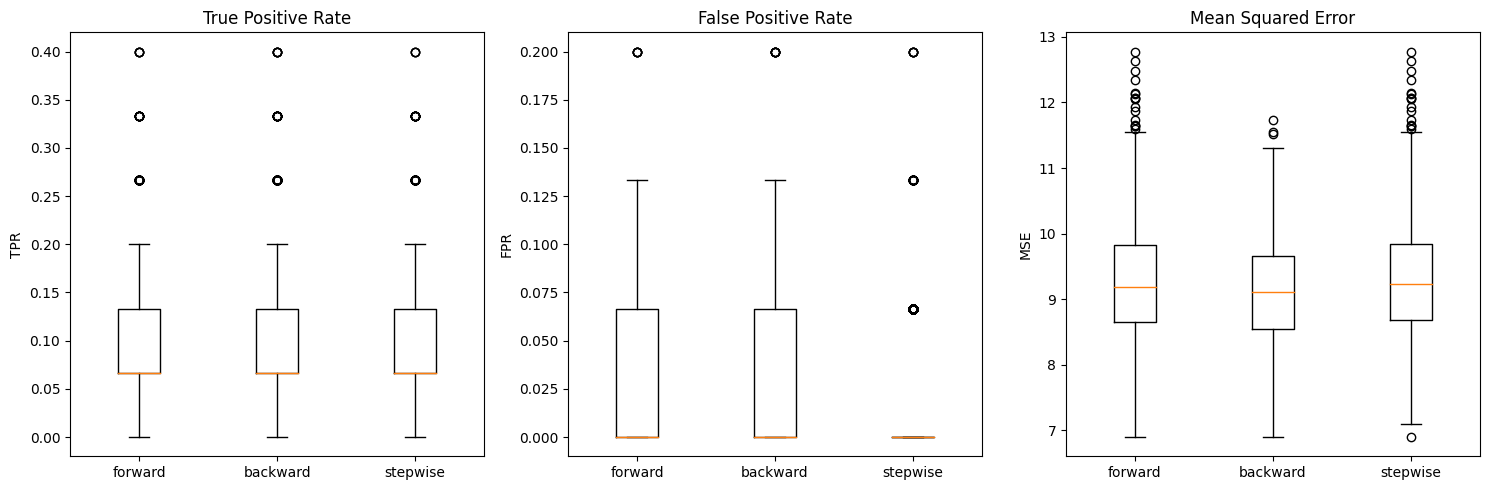

In [23]:
# 设置参数
p = 30
p1 = 15
Sigma_x = sigma_2 * np.eye(p)
M = 1000

forward_TPR = []
backward_TPR = []
stepwise_TPR = []
forward_FPR = []
backward_FPR = []
stepwise_FPR = []
forward_mses = []
backward_mses = []
stepwise_mses = []

forward_time = 0
backward_time = 0
stepwise_time = 0

# 进行 M 次实验
for m in range(M):
    X = construct_X(Sigma_x)

    # 初始化 beta 向量
    indices = np.random.choice(range(1, p + 1), p1, replace=False)  
    indices.sort() 
    beta = np.zeros(p + 1) 
    beta[0] = 1  # 截距项
    beta[indices] = 1  # 设置影响变量的系数为1
    True_features = set(indices)

    y = construct_y(X,beta)

    # 前进法
    start_time = time.time()
    selected_features, best_bic,best_beta = forward_selection(X,y)
    end_time = time.time()
    temp_time = end_time - start_time
    forward_time += temp_time
    selected_features_set = set(selected_features)
    selected_features.sort()
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(selected_features):
        beta_p[idx] = best_beta[i+1]
    TPR = len(selected_features_set & True_features) / p1
    FPR = len(selected_features_set - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    forward_TPR.append(TPR)
    forward_FPR.append(FPR)
    forward_mses.append(mse)

    # 后退法
    start_time = time.time()
    selected_features, best_bic,best_beta = backward_selection(X,y)
    end_time = time.time()
    temp_time = end_time - start_time
    backward_time += temp_time
    selected_features_set = set(selected_features)
    selected_features.sort()
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(selected_features):
        beta_p[idx] = best_beta[i+1]
    TPR = len(selected_features_set & True_features) / p1
    FPR = len(selected_features_set - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    backward_TPR.append(TPR)
    backward_FPR.append(FPR)
    backward_mses.append(mse)

    # 逐步选择
    start_time = time.time()
    selected_features, best_bic,best_beta = stepwise_selection(X,y)
    end_time = time.time()
    temp_time = end_time - start_time
    stepwise_time += temp_time
    selected_features_set = set(selected_features)
    selected_features.sort()
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(selected_features):
        beta_p[idx] = best_beta[i+1]
    TPR = len(selected_features_set & True_features) / p1
    FPR = len(selected_features_set - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    stepwise_TPR.append(TPR)
    stepwise_FPR.append(FPR)
    stepwise_mses.append(mse)
    

print("TPR mean")
print("forward:",round(np.mean(forward_TPR),4),"backward:",round(np.mean(backward_TPR),4),"stepwise:",round(np.mean(stepwise_TPR),4))
print("FPR mean")
print("forward:",round(np.mean(forward_FPR),4),"backward:",round(np.mean(backward_FPR),4),"stepwise:",round(np.mean(stepwise_FPR),4))
print("MSE mean")
print("forward:",round(np.mean(forward_mses),4),"backward:",round(np.mean(backward_mses),4),"stepwise:",round(np.mean(stepwise_mses),4))
print("mean time")
print("forward:",round(forward_time/M,4),"backward:",round(backward_time/M,4),"stepwise:",round(stepwise_time/M,4))

# 可视化结果
plt.figure(figsize=(15, 5))

# TPR 和 FPR
plt.subplot(1, 3, 1)
plt.boxplot([forward_TPR, backward_TPR, stepwise_TPR], labels=['forward', 'backward', 'stepwise'])
plt.title('True Positive Rate')
plt.ylabel('TPR')

plt.subplot(1, 3, 2)
plt.boxplot([forward_FPR, backward_FPR, stepwise_FPR], labels=['forward', 'backward', 'stepwise'])
plt.title('False Positive Rate')
plt.ylabel('FPR')

# MSE
plt.subplot(1, 3, 3)
plt.boxplot([forward_mses, backward_mses, stepwise_mses], labels=['forward', 'backward', 'stepwise'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

**$\mathbf{BIC}$ 版本结果分析**

- **True Positive Rate 真阳性率**:
   - 三种方法的 TPR 差别不大，均在 0.10 左右。逐步选择的 TPR 稍微低一点，但总体差异很小。

   - 这可能是因为三种方法都在较高的 $\mathbf{BIC}$ 准则下进行特征筛选，受到 $\mathbf{BIC}$ 惩罚力度大、倾向选择小模型的影响。

-  **False Positive Rate 假阳性率**:
   - FPR方面，逐步选择的FPR平均值最低，相较之下，前进法和后退法的FPR稍高。且逐步选择的离散程度远小于前进法和后退法，说明逐步选择的结果更加稳定。
   - **造成 FPR 差异**可能是因为
   
      - 在前进法中，每加入一个新自变量，可能会使此前已存在于模型中的自变量单独对因变量的解释能力减小，甚至降低到不显著的水平（无统计意义），但是前进法没有剔除机制，这样的自变量最终可能会被保留下来
      - 相反的，后退法则无法将先前剔除的自变量再次加入选择集合中
      - 逐步选择在每次特征引入或剔除的过程中进行双向调整，当引入一个特征后会重新检验之前选择的特征，这可以有效减少不必要的特征，从而减少误判（假阳性）率
      - 相比于前进法和后退法，逐步选择更加灵活，因此在不增加错误特征的同时达到较低的BIC，这可能有助于降低FPR

-  **Mean Squared Error 均方误差**:
   - 后退法的MSE略低，为9.1146，优于前进法和逐步选择。
   - MSE较低表示模型的预测误差更小，在这个实验中，后退法在误差最小化方面表现最佳，这可能是因为

      - 后退法从完整的特征集开始逐步剔除不重要的特征，保留了更全面的信息，从而可能保留了更多有助于降低预测误差的特征
      - 逐步选择和前进法有时会在特征较少时就达到局部最优解，因此MSE可能稍高

-  **平均运行时间**:
   - 运行时间方面，后退法的耗时明显较长，平均为0.2085，而前进法和逐步选择的时间较短，分别为0.0125和0.0132。
   - 可能原因
   
      - 前进法只是在初始特征集基础上逐步增加特征，避免了大量的模型重建，因此运行时间较短
      - 后退法从全特征集开始，每一步都要重新估计模型并计算BIC，因此在特征数量较多的情况下，计算开销较大，耗时较长
      - 逐步选择的理论时间复杂度较高，因为它每次既考虑引入特征也考虑剔除特征。但在本实验中，它的耗时却较短，这可能因为数据集的特征数量相对较少，逐步选择在前几步就收敛到较优解，避免了大量的循环和调整

**$\mathbf{AIC}$ 版本**

TPR mean
forward: 0.4018 backward: 0.4145 stepwise: 0.0203
FPR mean
forward: 0.1767 backward: 0.1866 stepwise: 0.002
MSE mean
forward: 9.6119 backward: 8.429 stepwise: 9.4613
mean time
forward: 0.0534 backward: 0.2406 stepwise: 0.0123


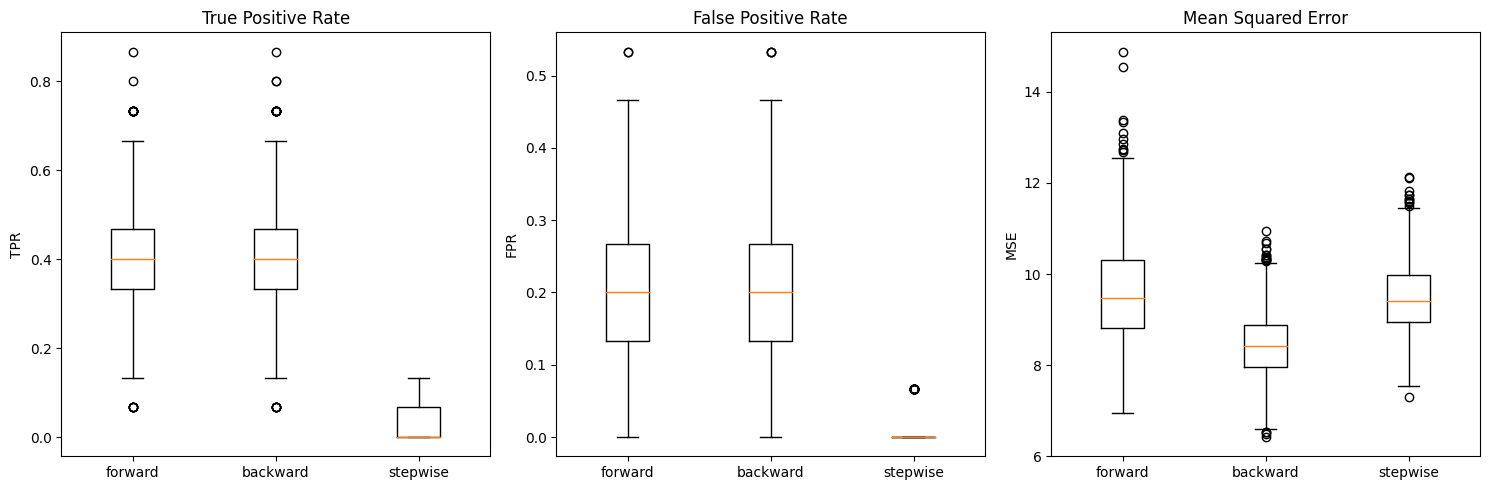

In [31]:
# 设置参数
p = 30
p1 = 15
Sigma_x = sigma_2 * np.eye(p)
M = 1000

forward_TPR = []
backward_TPR = []
stepwise_TPR = []
forward_FPR = []
backward_FPR = []
stepwise_FPR = []
forward_mses = []
backward_mses = []
stepwise_mses = []

forward_time = 0
backward_time = 0
stepwise_time = 0

# 进行 M 次实验
for m in range(M):
    X = construct_X(Sigma_x)

    # 初始化 beta 向量
    indices = np.random.choice(range(1, p + 1), p1, replace=False)  
    indices.sort() 
    beta = np.zeros(p + 1) 
    beta[0] = 1  # 截距项
    beta[indices] = 1  # 设置影响变量的系数为1
    True_features = set(indices)

    y = construct_y(X,beta)

    # 前进法
    start_time = time.time()
    selected_features, best_aic,best_beta = forward_selection(X,y)
    end_time = time.time()
    temp_time = end_time - start_time
    forward_time += temp_time
    selected_features_set = set(selected_features)
    selected_features.sort()
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(selected_features):
        beta_p[idx] = best_beta[i+1]
    TPR = len(selected_features_set & True_features) / p1
    FPR = len(selected_features_set - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    forward_TPR.append(TPR)
    forward_FPR.append(FPR)
    forward_mses.append(mse)

    # 后退法
    start_time = time.time()
    selected_features, best_aic,best_beta = backward_selection(X,y)
    end_time = time.time()
    temp_time = end_time - start_time
    backward_time += temp_time
    selected_features_set = set(selected_features)
    selected_features.sort()
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(selected_features):
        beta_p[idx] = best_beta[i+1]
    TPR = len(selected_features_set & True_features) / p1
    FPR = len(selected_features_set - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    backward_TPR.append(TPR)
    backward_FPR.append(FPR)
    backward_mses.append(mse)

    # 逐步选择
    start_time = time.time()
    selected_features, best_aic,best_beta = stepwise_selection(X,y)
    end_time = time.time()
    temp_time = end_time - start_time
    stepwise_time += temp_time
    selected_features_set = set(selected_features)
    selected_features.sort()
    beta_p = np.zeros(p + 1)
    beta_p[0] = 1
    for i, idx in enumerate(selected_features):
        beta_p[idx] = best_beta[i+1]
    TPR = len(selected_features_set & True_features) / p1
    FPR = len(selected_features_set - True_features) / (p - p1)
    mse = np.mean((y - X @ beta_p) ** 2)
    stepwise_TPR.append(TPR)
    stepwise_FPR.append(FPR)
    stepwise_mses.append(mse)
    

print("TPR mean")
print("forward:",round(np.mean(forward_TPR),4),"backward:",round(np.mean(backward_TPR),4),"stepwise:",round(np.mean(stepwise_TPR),4))
print("FPR mean")
print("forward:",round(np.mean(forward_FPR),4),"backward:",round(np.mean(backward_FPR),4),"stepwise:",round(np.mean(stepwise_FPR),4))
print("MSE mean")
print("forward:",round(np.mean(forward_mses),4),"backward:",round(np.mean(backward_mses),4),"stepwise:",round(np.mean(stepwise_mses),4))
print("mean time")
print("forward:",round(forward_time/M,4),"backward:",round(backward_time/M,4),"stepwise:",round(stepwise_time/M,4))

# 可视化结果
plt.figure(figsize=(15, 5))

# TPR 和 FPR
plt.subplot(1, 3, 1)
plt.boxplot([forward_TPR, backward_TPR, stepwise_TPR], labels=['forward', 'backward', 'stepwise'])
plt.title('True Positive Rate')
plt.ylabel('TPR')

plt.subplot(1, 3, 2)
plt.boxplot([forward_FPR, backward_FPR, stepwise_FPR], labels=['forward', 'backward', 'stepwise'])
plt.title('False Positive Rate')
plt.ylabel('FPR')

# MSE
plt.subplot(1, 3, 3)
plt.boxplot([forward_mses, backward_mses, stepwise_mses], labels=['forward', 'backward', 'stepwise'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

**$\mathbf{AIC}$ 版本结果分析**

$\text{BIC}$ 的惩罚项比 $\text{AIC}$ 更强，它在选择模型时对增加的参数更加保守。这会导致 $\text{BIC}$ 更倾向于选择较少的特征。所以在使用 $\mathbf{AIC}$ 进行结果分析得到结果会有更显著的差异。

- **True Positive Rate 真阳性率**:
   - 前进法和后退法的 TPR 远高于 逐步选择法，可能是因为 

      - 前进法和后退法都保留了较多的特征，更好地保留了有价值的特征
      - 逐步选择可能因为在某个阶段剔除了重要特征，导致模型表现不如前进法或后退法，从而出现欠拟合
   
   - 除此之外，可以看出逐步选择的离散程度远小于前进法和后退法，这说明逐步选择更稳定

-  **False Positive Rate 假阳性率**:
   结果与趋势同 $\text{BIC}$ 

-  **Mean Squared Error 均方误差**:
   结果与趋势同 $\text{BIC}$ 

-  **平均运行时间**:
   结果与趋势同 $\text{BIC}$ 

**综上所述，**<br>
如果要得到更为稳妥的结论，逐步选择是最好的选择，它可以很好地避免引入不相关的变量。